In [1]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Data

In [2]:
np.random.seed(0)
data = datasets.load_digits()
x_data = data.data
y_data = data.target
n_classes = len(np.unique(y_data))

# 노이즈 추가
random_state = np.random.RandomState(0)
n_samples, n_features = x_data.shape
x_data = np.c_[x_data, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

print("x_data :", x_data.shape)
print("y_data :", y_data.shape)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test :', x_test.shape)
print('y_test :', y_test.shape)
print('unique labels:', len(np.unique(y_test)))

x_data : (1797, 12864)
y_data : (1797,)
x_train: (898, 12864)
y_train: (898,)
x_test : (899, 12864)
y_test : (899,)
unique labels: 10


# Model

In [10]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=0, n_estimators=5, num_leaves=2, max_depth=1, objective='multiclass')
model.fit(x_train, y_train)

LGBMClassifier(max_depth=1, n_estimators=5, num_leaves=2,
               objective='multiclass', random_state=0)

# Evaluation

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

print('ACC       :', accuracy_score(y_test, y_pred))
print('Recall    :', recall_score(y_test, y_pred, average='macro'))
print('Precision :', recall_score(y_test, y_pred, average='macro'))

print(classification_report(y_test, y_pred))

ACC       : 0.6796440489432704
Recall    : 0.6949392275045161
Precision : 0.6949392275045161
              precision    recall  f1-score   support

           0       0.72      0.99      0.83        89
           1       0.58      0.59      0.59        90
           2       0.75      0.68      0.72        92
           3       0.69      0.75      0.72        93
           4       0.84      0.76      0.80        76
           5       0.96      0.20      0.34       108
           6       0.54      0.97      0.69        89
           7       0.60      0.94      0.73        78
           8       0.91      0.53      0.67        92
           9       0.67      0.53      0.59        92

    accuracy                           0.68       899
   macro avg       0.73      0.69      0.67       899
weighted avg       0.73      0.68      0.66       899



In [12]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

fpr = [None] * n_classes
tpr = [None] * n_classes
roc_auc = [None] * n_classes
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(y_test == i, y_pred == i)

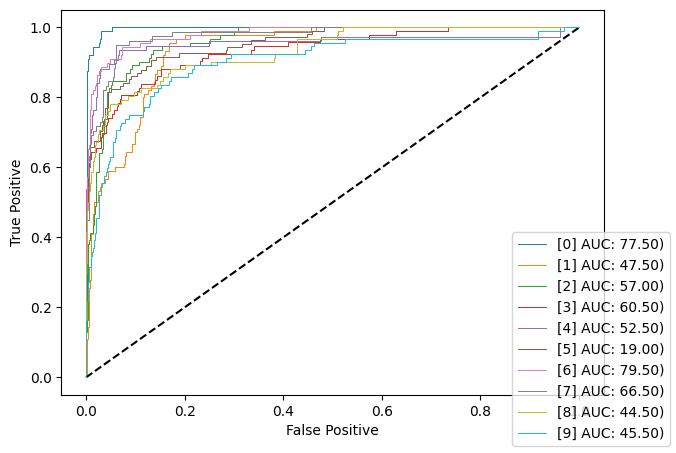

In [13]:
def plot_roc(lw=0.7):
    idx = 0
    fig, ax = plt.subplots(1, figsize=(7, 5))
    ax.plot([0, 1], [0, 1], "k--")
    
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], lw=lw, label=f"[{i}] AUC: {roc_auc[i]:.2f})")
    
    ax.set_ylabel('True Positive')
    ax.set_xlabel('False Positive')
    fig.legend(loc='lower right')
    return fig
    
fig = plot_roc()

## ScikitPlot

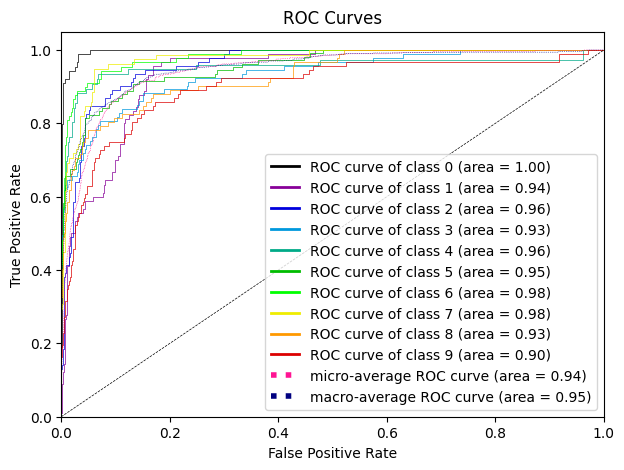

In [14]:
import scikitplot as skplt

y_prob = model.predict_proba(x_test)

fig, ax = plt.subplots(1, figsize=(7, 5))
skplt.metrics.plot_roc(y_test, y_prob, ax=ax)

# Line
for line in ax.get_lines():
    line.set_linewidth(0.5)

## Precision Recall Cruve 

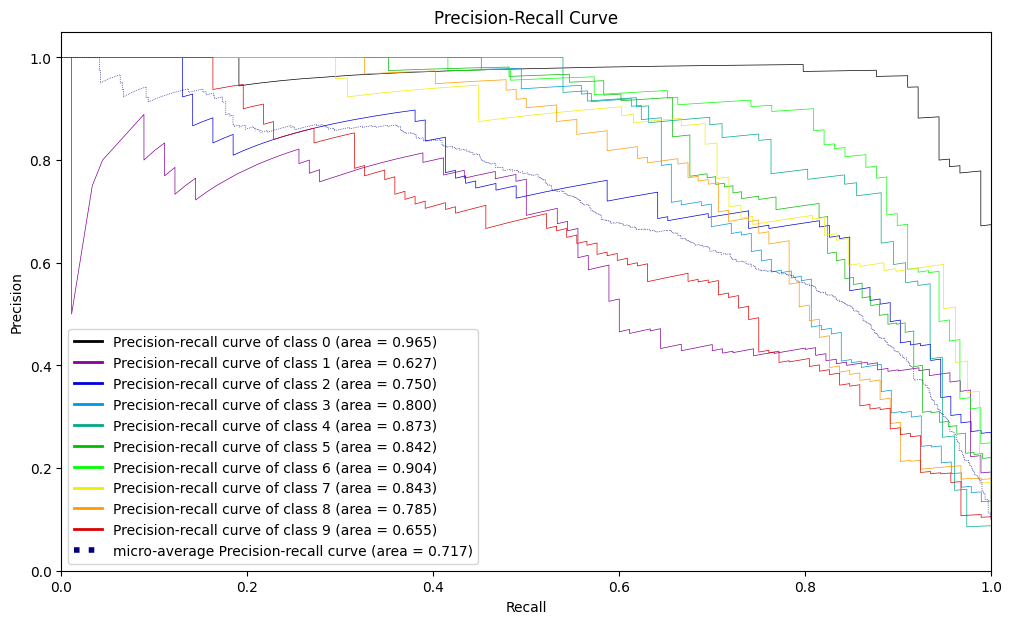

In [17]:
import scikitplot as skplt
y_prob = model.predict_proba(x_test)

fig, ax = plt.subplots(1, figsize=(12, 7))
skplt.metrics.plot_precision_recall(y_test, y_prob, ax=ax)

# Line
for line in ax.get_lines():
    line.set_linewidth(0.5)